In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_data = pd.read_csv('/content/train_ctrUa4K.csv')

In [5]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train_data.shape

(614, 13)

In [7]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<Axes: >

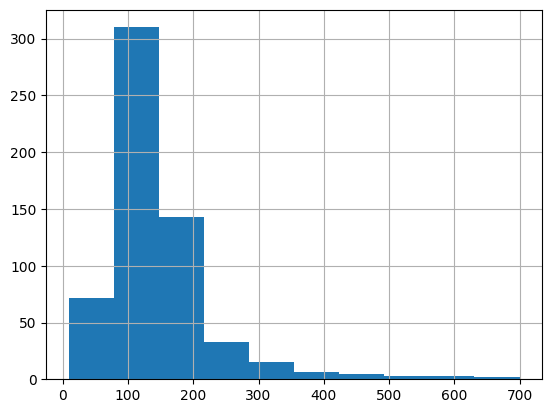

In [9]:
train_data['LoanAmount'].hist()

<Axes: >

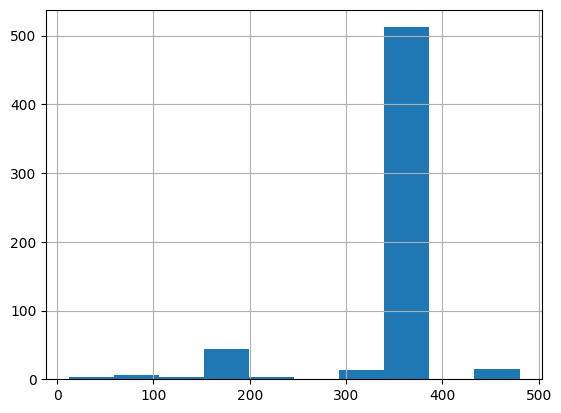

In [10]:
train_data['Loan_Amount_Term'].hist()

<Axes: >

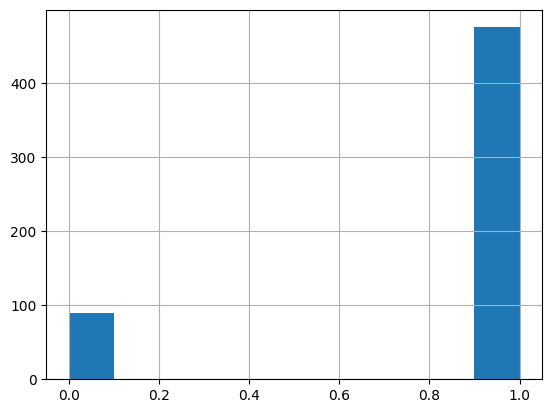

In [11]:
train_data['Credit_History'].hist()

In [12]:
## exploratory Data Analysis
train_data['LoanAmount'] = train_data['LoanAmount'].fillna(train_data['LoanAmount'].median())
train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median())
train_data['Credit_History'] = train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0])

In [13]:

train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
train_data['Gender'] = train_data['Gender'].fillna(train_data['Gender'].mode()[0])
train_data['Married'] = train_data['Married'].fillna(train_data['Married'].mode()[0])
train_data['Self_Employed'] = train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0])
train_data['Dependents'] = train_data['Dependents'].fillna(train_data['Dependents'].mode()[0])

In [15]:
train_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
train_data.drop('Loan_ID',axis =1 ,inplace =True)

In [17]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['Gender'] = le.fit_transform(train_data['Gender'])
train_data['Married'] = le.fit_transform(train_data['Married'])
train_data['Education'] = le.fit_transform(train_data['Education'])
train_data['Self_Employed'] = le.fit_transform(train_data['Self_Employed'])
train_data['Property_Area'] = le.fit_transform(train_data['Property_Area'])
train_data['Loan_Status'] = le.fit_transform(train_data['Loan_Status'])

In [19]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [20]:
train_data['Loan_Status'].unique()

array([1, 0])

In [21]:
X = train_data.drop(['Loan_Status','Gender','Married','Dependents','Education','Self_Employed','Property_Area'],axis =1 )
y = train_data['Loan_Status']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [24]:
##Linear Regression


In [25]:
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
model = lin_regressor.fit(X_train,y_train)

In [26]:
predictions = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE = ',mean_squared_error(y_test,predictions))
print('R squared value = ',r2_score(y_test,predictions))

MSE =  0.16364914747765394
R squared value =  0.28027675808446906


In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(X_train,y_train)

In [29]:
y_predictions = model.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [31]:
confusion_matrix(y_test,y_predictions)

array([[18, 25],
       [ 1, 79]])

In [32]:
print('Accuracy = ',accuracy_score(y_test,y_predictions))
print('Precision = ',precision_score(y_test,y_predictions))
print('Recall = ',recall_score(y_test,y_predictions))
print('F1 score = ',f1_score(y_test,y_predictions))

Accuracy =  0.7886178861788617
Precision =  0.7596153846153846
Recall =  0.9875
F1 score =  0.8586956521739131


In [50]:
##KNN Regression

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
metric_k =[]
neighbors = np.arange(3,15)

In [35]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors =k,metric ='euclidean')
    classifier.fit(X_train,y_train)
    y_predictions = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

In [36]:
metric_k

[0.6178861788617886,
 0.5609756097560976,
 0.5772357723577236,
 0.5691056910569106,
 0.5853658536585366,
 0.5853658536585366,
 0.5772357723577236,
 0.5609756097560976,
 0.6016260162601627,
 0.5853658536585366,
 0.5934959349593496,
 0.5853658536585366]

In [37]:
 classifier = KNeighborsClassifier(n_neighbors =5,metric ='euclidean')
classifier.fit(X_train,y_train)
y_predictions = classifier.predict(X_test)

In [38]:
print('Accuracy = ',accuracy_score(y_test,y_predictions))
print('Precision = ',precision_score(y_test,y_predictions))
print('Recall = ',recall_score(y_test,y_predictions))
print('F1 score = ',f1_score(y_test,y_predictions))
confusion_matrix(y_test,y_predictions)

Accuracy =  0.5772357723577236
Precision =  0.6320754716981132
Recall =  0.8375
F1 score =  0.7204301075268816


array([[ 4, 39],
       [13, 67]])

In [59]:
## SVM

In [39]:
from sklearn.svm import SVC
svmc1f = SVC(kernel = 'linear')
svmc1f.fit(X_train,y_train)

SVC(kernel='linear')

In [40]:
y_pred = svmc1f.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is',accuracy_score(y_test,y_pred))

Accuracy is 0.7723577235772358


In [42]:
print(confusion_matrix(y_test,y_pred))

[[15 28]
 [ 0 80]]


In [43]:
## Decision Trees
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred = dt_clf.predict(X_test)

In [45]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy is 0.7235772357723578
[[24 19]
 [15 65]]


In [46]:
##random forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
y_pred = rf_clf.predict(X_test)

In [48]:
print('Accuracy is',accuracy_score(y_test,y_pred))

Accuracy is 0.7642276422764228


In [49]:
#Hyper parameter tuning
rf_clf1=RandomForestClassifier(n_estimators =20,max_depth =20,criterion ='entropy',min_samples_split =3)
rf_clf1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=20)

In [50]:
y_pred = rf_clf1.predict(X_test)

In [51]:
print('Accuracy is',accuracy_score(y_test,y_pred))

Accuracy is 0.7479674796747967


In [52]:
## Testing data

In [55]:
test_data = pd.read_csv('/content/test_lAUu6dG.csv')

In [56]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [57]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

<Axes: >

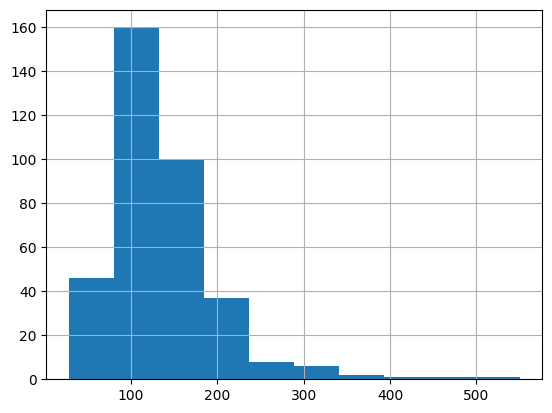

In [58]:
test_data['LoanAmount'].hist()

<Axes: >

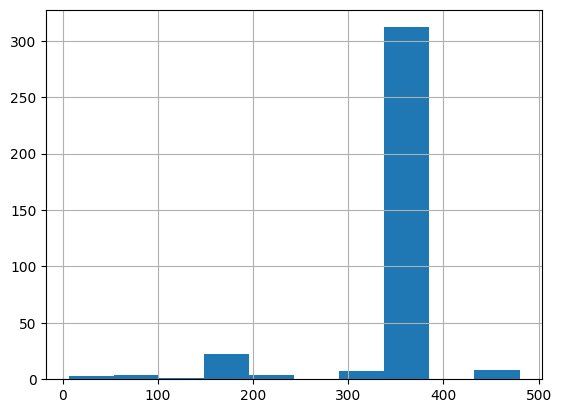

In [59]:
test_data['Loan_Amount_Term'].hist()

<Axes: >

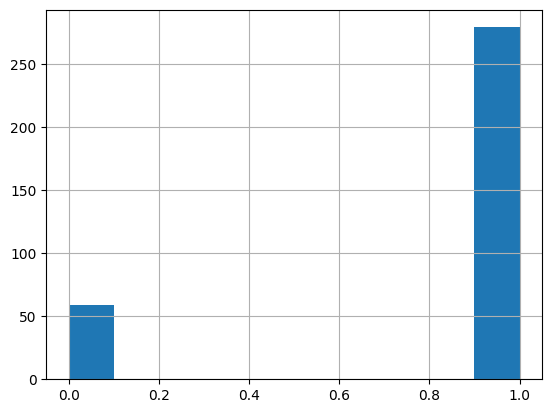

In [60]:
test_data['Credit_History'].hist()

In [61]:
test_data[['LoanAmount','Loan_Amount_Term']]=test_data[['LoanAmount','Loan_Amount_Term']].fillna(test_data[['LoanAmount','Loan_Amount_Term']].median())

In [62]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

In [63]:
test_data['Gender']=test_data['Gender'].fillna(test_data['Gender'].mode()[0])
test_data['Dependents']=test_data['Dependents'].fillna(test_data['Dependents'].mode()[0])
test_data['Self_Employed']=test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0])
test_data['Credit_History']=test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0])

In [64]:
test_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [65]:
sample_submission = pd.read_csv('/content/sample_submission_49d68Cx.csv')

In [66]:
sample_submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto','sqrt','log2']
max_depth = [int(x) for x in np.linspace(start=10, stop=1000, num=10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1,2,4,6,8]

In [69]:
random_grid = {'n_estimators':n_estimators,
               'max_features' :max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion': ['entropy','gini','log_loss']}

In [70]:
from sklearn.model_selection import RandomizedSearchCV

In [71]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto','sqrt','log2']
max_depth = [int(x) for x in np.linspace(start=10, stop=1000, num=10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1,2,4,6,8]

In [72]:
random_grid = {'n_estimators':n_estimators,
               'max_features' :max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion': ['entropy','gini','log_loss']}

In [73]:


random_grid = {'n_estimators':n_estimators,
               'max_features' :max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion': ['entropy','gini','log_loss']}

In [ ]:
rf_randomcv = RandomizedSearchCV(estimator = rf_clf,param_distributions=random_grid,
                                 n_iter = 100, cv=3, verbose=2,random_state=100, n_jobs=-1)

rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [111]:
rf_randomcv.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 340,
 'criterion': 'log_loss'}

In [112]:
rf_randomcv.best_estimator_

RandomForestClassifier(criterion='log_loss', max_depth=340, min_samples_leaf=6,
                       min_samples_split=10, n_estimators=1600)

In [113]:
best_random = rf_randomcv.best_estimator_

In [114]:
best_params = rf_randomcv.best_params_

new_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split']
)

In [117]:
best_params

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 340,
 'criterion': 'log_loss'}